<a href="https://colab.research.google.com/github/AnanLu/PHYS641_2022_solution/blob/main/PS4/PS4_feed_design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

The signal strength of the source at the feed is determined by the gain of the telescope, and so we want to maximize the gain $G = A_{eff}/2k$.

For a point source that lies at the centre of the beam, the total power collected from the source at the feed is determined by the effective area of a Gaussian beam times the fraction of the Gaussian feed beam that ends up on the primary of radius R:

$$\frac{A_{eff}}{A} = \frac{\int_0^{2\pi}\int_0^{\infty}{e^{-r^2/2\sigma^2}}rdrd\theta}{\int_0^{2\pi}\int_0^{\infty}rdrd\theta} ~f$$

with:

$$f = \frac{\int_0^{2\pi}\int_0^{\infty}{e^{-r^2/2\sigma^2}}rdrd\theta}{\int_0^{2\pi}\int_0^{\infty}{e^{-r^2/2\sigma^2}}rdrd\theta}$$
Evaluating the integrals and simplifying, we get:
$$\frac{A_{eff}}{A} = 2\left(\frac{\sigma}{R}\right)^2(1 - e^{-\frac{1}{2}(R/\sigma)^2}) ~f$$
$$f = 1 - e^{-\frac{1}{2}(R/\sigma)^2}$$

In [ ]:
def beam_frac(sigma,R):
    return 1 - np.exp(-0.5*(R/sigma)**2)

def A_eff_frac(sigma,R):
    f = beam_frac(sigma,R)
    return (2*(sigma/R)**2) * (1 - np.exp(-0.5*(R/sigma)**2)) * f

def Gain(sigma,R):
    # k = 1.38 * 10**3
    k = 2 * 10**3
    return (A_eff_frac(sigma,R)*np.pi*R**2)/(2*k) # K/Jy

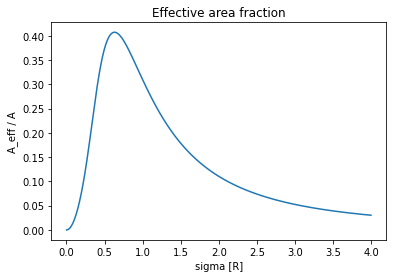

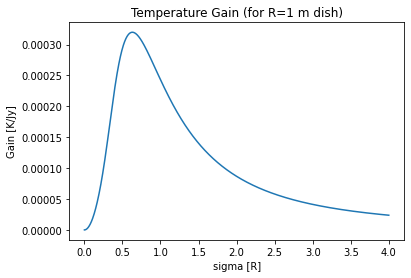

The signal strength is maximized when sigma = 0.63 R
At the peak A_eff/A = 0.41


In [ ]:
R = 1
sigma = np.linspace(0.001,4,1000)*R

plt.plot(sigma,A_eff_frac(sigma,R))
plt.title('Effective area fraction')
plt.xlabel('sigma [R]')
plt.ylabel('A_eff / A')
plt.show()

plt.plot(sigma,Gain(sigma,R))
plt.title('Temperature Gain (for R=1 m dish)')
plt.xlabel('sigma [R]')
plt.ylabel('Gain [K/Jy]')
plt.show()

print('The signal strength is maximized when sigma = {:.2f} R'.format(sigma[np.argmax(A_eff_frac(sigma,R))]))
print('At the peak A_eff/A = {:.2f}'.format(np.max(A_eff_frac(sigma,R))))

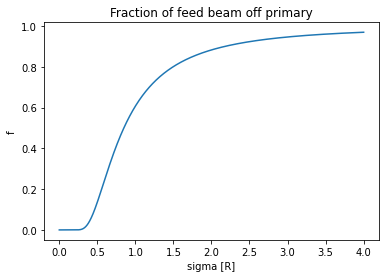

Fraction of feed beam off primary at peak value = 0.28


In [ ]:
plt.plot(sigma,1-beam_frac(sigma,R))
plt.title('Fraction of feed beam off primary')
plt.xlabel('sigma [R]')
plt.ylabel('f')
plt.show()

off_beam_frac = 1-beam_frac(sigma,R)[np.argmax(A_eff_frac(sigma,R))]

print('Fraction of feed beam off primary at peak value = {:.2f}'.format(off_beam_frac))

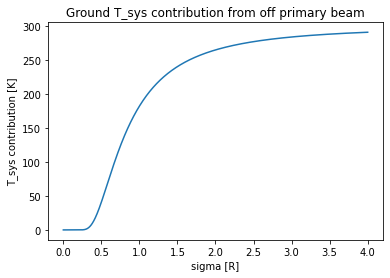

At the peak value, ground contribution to T_sys is = 85 K


In [ ]:
plt.plot(sigma,300*(1-beam_frac(sigma,R)))
plt.title('Ground T_sys contribution from off primary beam')
plt.ylabel('T_sys contribution [K]')
plt.xlabel('sigma [R]')
plt.show()

print('At the peak value, ground contribution to T_sys is = {:.0f} K'.format(off_beam_frac*300))

We can see that at the peak signal strength value the ground contribution to $T_{sys}$ of 85 K is already much more than the 25 K noise temperature of the receiver, which means the overall detector sensitivity for the astrophysical sources we are interested in will be much worse. So in practice we would actually want to consider a lower $\sigma$ for the beam where the ground contribution is minimized while still having a reasonably high gain.